In [3]:
import requests

res = requests.post("http://localhost:8080/predictions/cifar10_basic", files={'data': open('/workspace/Model_Serving/data/sample/dog.jpg', 'rb')})

res.json()

{'Maltese_dog': 0.9376580715179443,
 'Tibetan_terrier': 0.013367845676839352,
 'Lhasa': 0.010067587718367577,
 'Japanese_spaniel': 0.008088722825050354,
 'Sealyham_terrier': 0.00570318941026926}

In [13]:
res = requests.post("http://localhost:8080/explanations/cifar10_basic", files={'data': open('/workspace/Model_Serving/data/sample/dog.jpg', 'rb')})

ig = res.json()

In [14]:
ig

[[[-0.0022367092033134545,
   -0.003232557643373337,
   2.770623259176936e-06,
   0.0021818065692576646,
   0.003031034198593261,
   0.0002842187468231418,
   0.007159692244846133,
   0.005514672353228401,
   0.0056880567553364726,
   0.001097581269832191,
   0.004509899346055707,
   0.004448639421175495,
   0.006759586184694618,
   0.008273953184844873,
   0.008119751843247796,
   0.004431527363670446,
   0.00164256650985077,
   0.0007450945545938092,
   0.0019101664028274726,
   0.0011719758172583123,
   0.0034247131685086894,
   0.004042629703451678,
   0.00311606884353413,
   0.003929611998872562,
   0.0042037310745081675,
   0.006125040250727191,
   0.005982005451389898,
   0.004946615123079304,
   0.0027039430801882617,
   0.0015368538683483428,
   -4.860453340742466e-05,
   0.0007257291279433956,
   -0.002224832572614507,
   -0.0032883533758206844,
   -0.001110424289813387,
   0.0005922838576207175,
   0.001348397930934529,
   0.0006402528204747081,
   0.001302706377743395,
   0

In [22]:
ig.shape

AttributeError: 'list' object has no attribute 'shape'

In [15]:
import torch
import numpy as np
import torchvision.transforms as T

from PIL import Image

from captum.attr import visualization as viz

In [18]:
img_path = "/workspace/Model_Serving/data/sample/dog.jpg"

inp_image = Image.open(img_path)
to_tensor = T.Compose([
	T.Resize((224,224)),
	T.ToTensor()
])
inp_image = to_tensor(inp_image)

inp_image = inp_image.numpy()
attributions = np.array(ig)

inp_image, attributions = inp_image.transpose(1, 2, 0), attributions.transpose(1, 2, 0)

In [19]:
inp_image.shape,attributions.shape

((224, 224, 3), (224, 224, 3))

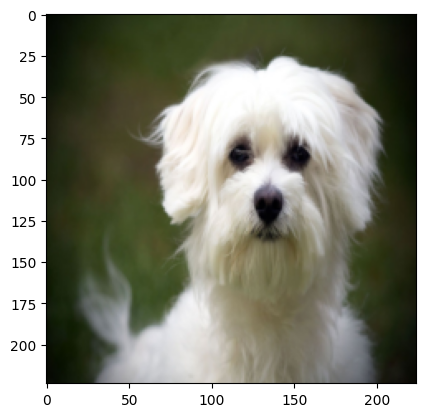

In [20]:
import matplotlib.pyplot as plt

plt.imshow(inp_image, cmap="inferno")


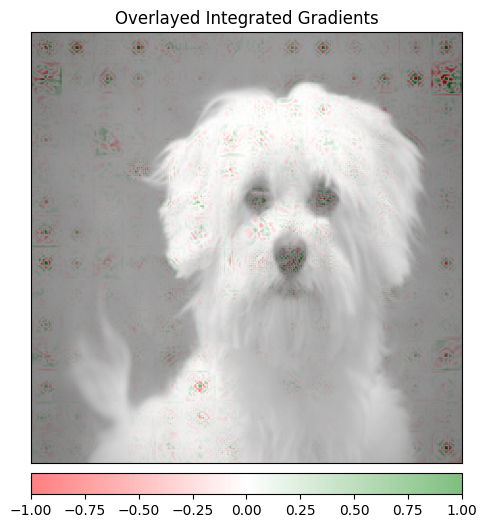

(<Figure size 600x600 with 2 Axes>,
 <AxesSubplot: title={'center': 'Overlayed Integrated Gradients'}>)

In [21]:
viz.visualize_image_attr(attributions, inp_image, method="blended_heat_map",sign="all", show_colorbar=True, title="Overlayed Integrated Gradients")